In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive")
!ls

 cat_vs_dog  'Colab Notebooks'	 Dataset   DriveUploader


In [ ]:
import os

# Print the contents of the directory to verify file names and locations
directory_contents = os.listdir("/content/drive/MyDrive/Dataset/")
print("Contents of the directory:", directory_contents)


Contents of the directory: ['test', 'train']


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Path to the dataset
train_data_dir = "/content/drive/MyDrive/Dataset/train"
train_labels_file = "/content/drive/MyDrive/Dataset/train"

test_data_dir = "/content/drive/MyDrive/Dataset/test"
test_labels_file = "/content/drive/MyDrive/Dataset/test"

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Path to the dataset
train_data_dir = "/content/drive/MyDrive/Dataset/train"
test_data_dir = "/content/drive/MyDrive/Dataset/test"

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32

# Generate batches of augmented data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generate batches of augmented data for testing
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the CNN architecture with 11 output classes
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.25),  # Dropout layer to reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=test_generator)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print("Test accuracy:", test_acc)

test_accuracy_percentage = test_acc * 100
print("Test accuracy:", test_accuracy_percentage, "%")


Found 1431 images belonging to 11 classes.
Found 234 images belonging to 11 classes.
Epoch 1/15
45/45 [==============================] - 223s 5s/step - loss: 2.3386 - accuracy: 0.1684 - val_loss: 2.0945 - val_accuracy: 0.2094
Epoch 2/15
45/45 [==============================] - 8s 168ms/step - loss: 1.6775 - accuracy: 0.4738 - val_loss: 1.0394 - val_accuracy: 0.6667
Epoch 3/15
45/45 [==============================] - 5s 120ms/step - loss: 0.9811 - accuracy: 0.6785 - val_loss: 0.7634 - val_accuracy: 0.7393
Epoch 4/15
45/45 [==============================] - 7s 148ms/step - loss: 0.6812 - accuracy: 0.7708 - val_loss: 0.5207 - val_accuracy: 0.8462
Epoch 5/15
45/45 [==============================] - 5s 120ms/step - loss: 0.5316 - accuracy: 0.8162 - val_loss: 0.4718 - val_accuracy: 0.7906
Epoch 6/15
45/45 [==============================] - 6s 135ms/step - loss: 0.4443 - accuracy: 0.8505 - val_loss: 0.2879 - val_accuracy: 0.9487
Epoch 7/15
45/45 [==============================] - 6s 143ms/ste

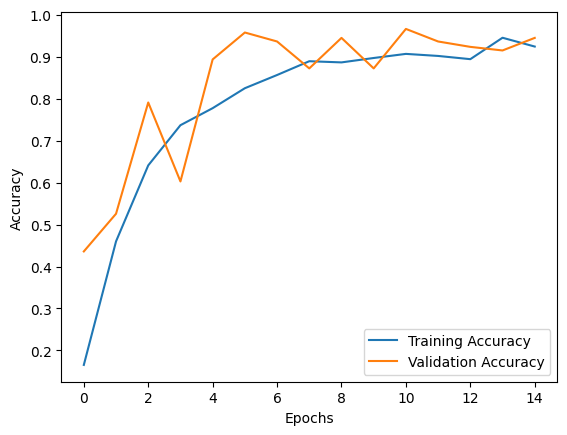

In [ ]:

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


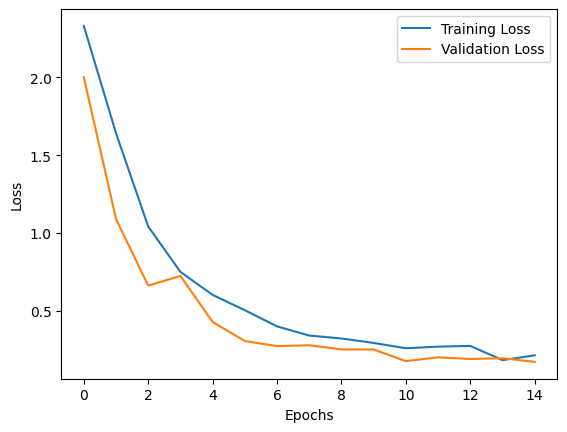

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict classes for the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Calculate precision, recall, and F1 score
class_labels = list(test_generator.class_indices.keys())
classification_report_result = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", classification_report_result)


8/8 [==============================] - 1s 88ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.05      0.05      0.05        21
           1       0.19      0.14      0.16        21
          10       0.10      0.10      0.10        21
           2       0.00      0.00      0.00        21
           3       0.04      0.05      0.04        21
           4       0.15      0.10      0.12        21
           5       0.15      0.19      0.17        21
           6       0.08      0.08      0.08        24
           7       0.10      0.10      0.10        21
           8       0.14      0.14      0.14        21
           9       0.05      0.05      0.05        21

    accuracy                           0.09       234
   macro avg       0.09      0.09      0.09       234
weighted avg       0.09      0.09      0.09       234



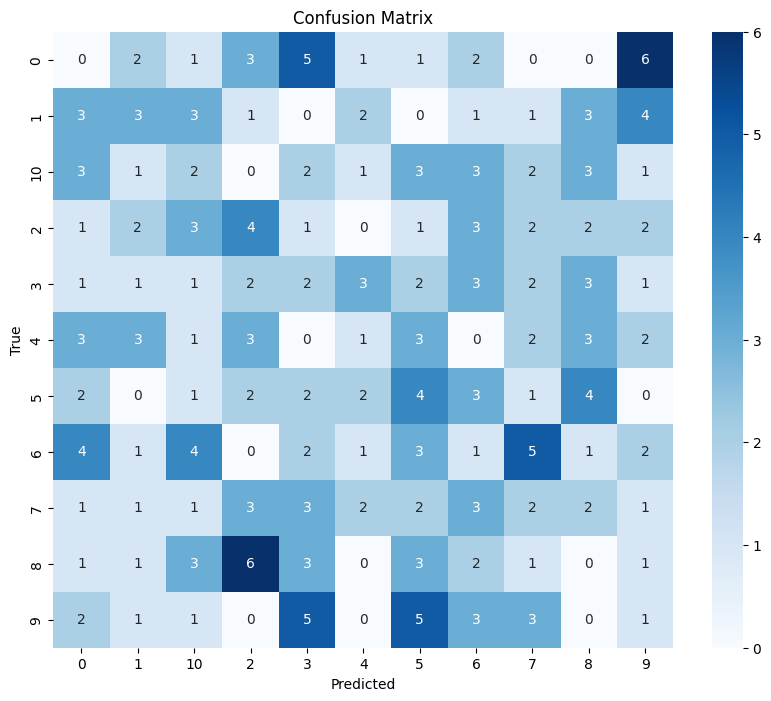

In [ ]:
import seaborn as sns
import pandas as pd

# Create a confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
